# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_file/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [3]:
# convert cities list into a pandas dataframe
cities_df = pd.DataFrame(cities)

# Rename column
cities_df = cities_df.rename(columns={0: "City"})
cities_df.head()

,City
0,hilo
1,mitsamiouli
2,fayaoue
3,east london
4,mataura


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# params dictionary to update each iteration
params = {
    "appid": weather_api_key,
    "units": "metric"
}

# Add columns for lat, lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""

# counters to keep track of record number per set
record_no = 1
set_no = 1


print("Beginning Data Retrieval")
print("------------------------------")


# Use the city name to identify lat, lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date
for index, row in cities_df.iterrows():
    
    # get city from dataframe
    city = row["City"]

    # change location each iteration while leaving original params in place
    params["q"] = f"{city}"

    # Use the units term to return metric data for each city
    base_url = "https://api.openweathermap.org/data/2.5/weather?"

    # make request and convert to json
    city_detail = requests.get(base_url, params=params).json()

    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        
        # Adding collected data to cities dataframe
        cities_df.loc[index, "Lat"] = city_detail['coord']['lat']
        cities_df.loc[index, "Lng"] = city_detail["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = city_detail["main"]["temp_max"]
        cities_df.loc[index, "Humidity"] = city_detail["main"]["humidity"]
        cities_df.loc[index, "Cloudiness"] = city_detail["clouds"]["all"]
        cities_df.loc[index, "Wind Speed"] = city_detail["wind"]["speed"]
        cities_df.loc[index, "Country"] = city_detail["sys"]["country"]
        cities_df.loc[index, "Date"] = city_detail["dt"]
        
        # Print Record
        print(f"Processing Record {record_no} of set {set_no} | {city}")
        
        # Add to record counter
        record_no += 1
    
    # Add except 
    except (KeyError, IndexError):
        print("City not found. Skipping....")
        
        # Drop city if not found
        cities_df.drop(index, inplace=True)
        
        # Reset record counter
        record_no = 1
        
        # Add to set counter
        set_no += 1
print("----------------------------- Data Retrieval Complete -----------------------------")

# Reset index
cities_df.reset_index(drop=True, inplace=True)

Beginning Data Retrieval
------------------------------
Processing Record 1 of set 1 | hilo
Processing Record 2 of set 1 | mitsamiouli
Processing Record 3 of set 1 | fayaoue
Processing Record 4 of set 1 | east london
Processing Record 5 of set 1 | mataura
Processing Record 6 of set 1 | kahului
Processing Record 7 of set 1 | rikitea
Processing Record 8 of set 1 | belyy yar
Processing Record 9 of set 1 | goundam
Processing Record 10 of set 1 | kapaa
Processing Record 11 of set 1 | albany
Processing Record 12 of set 1 | tasiilaq
Processing Record 13 of set 1 | longyearbyen
Processing Record 14 of set 1 | carnarvon
Processing Record 15 of set 1 | ponta do sol
Processing Record 16 of set 1 | avarua
Processing Record 17 of set 1 | zalantun
City not found. Skipping....
Processing Record 1 of set 2 | port alfred
Processing Record 2 of set 2 | sterling
Processing Record 3 of set 2 | guerrero negro
City not found. Skipping....
Processing Record 1 of set 3 | lebu
Processing Record 2 of set 3 | ka

Processing Record 6 of set 19 | ngunguru
Processing Record 7 of set 19 | yumen
Processing Record 8 of set 19 | morong
Processing Record 9 of set 19 | lianran
Processing Record 10 of set 19 | fairbanks
Processing Record 11 of set 19 | tabou
City not found. Skipping....
Processing Record 1 of set 20 | talnakh
Processing Record 2 of set 20 | raudeberg
Processing Record 3 of set 20 | stromness
Processing Record 4 of set 20 | masallatah
Processing Record 5 of set 20 | bethel
Processing Record 6 of set 20 | airai
City not found. Skipping....
City not found. Skipping....
Processing Record 1 of set 22 | praia
City not found. Skipping....
Processing Record 1 of set 23 | igunga
City not found. Skipping....
Processing Record 1 of set 24 | fortuna
Processing Record 2 of set 24 | kavieng
Processing Record 3 of set 24 | pangnirtung
Processing Record 4 of set 24 | victoria
Processing Record 5 of set 24 | georgetown
Processing Record 6 of set 24 | jamestown
Processing Record 7 of set 24 | ustye
Proces

Processing Record 3 of set 39 | jejuri
Processing Record 4 of set 39 | puro
Processing Record 5 of set 39 | boa vista
Processing Record 6 of set 39 | soderhamn
City not found. Skipping....
Processing Record 1 of set 40 | chingirlau
Processing Record 2 of set 40 | alta gracia
Processing Record 3 of set 40 | yar-sale
Processing Record 4 of set 40 | floro
Processing Record 5 of set 40 | mawlaik
Processing Record 6 of set 40 | acarau
Processing Record 7 of set 40 | nome
City not found. Skipping....
Processing Record 1 of set 41 | alofi
Processing Record 2 of set 41 | santa ana
Processing Record 3 of set 41 | gamba
Processing Record 4 of set 41 | socorro
Processing Record 5 of set 41 | constitucion
Processing Record 6 of set 41 | namibe
Processing Record 7 of set 41 | manadhoo
Processing Record 8 of set 41 | deputatskiy
Processing Record 9 of set 41 | inirida
Processing Record 10 of set 41 | barra do garcas
Processing Record 11 of set 41 | florence
Processing Record 12 of set 41 | codringto

Processing Record 9 of set 56 | vagur
Processing Record 10 of set 56 | miranda
Processing Record 11 of set 56 | pervomayskiy
Processing Record 12 of set 56 | portland
Processing Record 13 of set 56 | kununurra
Processing Record 14 of set 56 | canico
Processing Record 15 of set 56 | osmena
City not found. Skipping....
Processing Record 1 of set 57 | mahanoro
Processing Record 2 of set 57 | tautira
Processing Record 3 of set 57 | waraseoni
Processing Record 4 of set 57 | cozumel
Processing Record 5 of set 57 | komsomolskiy
----------------------------- Data Retrieval Complete -----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Export the city data into a .csv.
cities_df.to_csv(output_data_file)  

# Display the DataFrame
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.09,31.27,71,0,5.14,US,1662853254
1,mitsamiouli,-11.3847,43.2844,23.87,71,10,2.72,KM,1662853255
2,fayaoue,-20.65,166.533,24.59,81,2,2.58,NC,1662853256
3,east london,-33.0153,27.9116,18.7,85,97,3.36,ZA,1662853256
4,mataura,-46.1927,168.864,12.77,50,3,1.64,NZ,1662853257


In [6]:
# Convert columns to float or int types
cities_df[cities_df.columns[1:4]] = cities_df.iloc[:, 1:4].astype('float64')
cities_df[cities_df.columns[4:6]] = cities_df.iloc[:, 4:6].astype('int64')
cities_df[cities_df.columns[6:7]] = cities_df.iloc[:, 6:7].astype('float64')
cities_df[cities_df.columns[8:9]] = cities_df.iloc[:, 8:9].astype('int64')

# Display basic overview of the data
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,20.158699,15.473798,19.444655,71.023009,49.853097,3.254442,1.662853e+09
std,32.530402,88.119966,8.037267,21.047258,39.978736,2.298011,1.320846e+02
min,-54.800000,-179.166700,-0.090000,12.000000,0.000000,0.000000,1.662853e+09
25%,-4.387800,-61.193600,12.810000,60.000000,5.000000,1.570000,1.662853e+09
50%,22.566700,21.286900,21.510000,77.000000,49.000000,2.680000,1.662853e+09
75%,47.415300,93.450000,26.020000,87.000000,95.000000,4.360000,1.662854e+09
max,78.218600,179.316700,36.380000,100.000000,100.000000,15.650000,1.662854e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
over_100 = cities_df.index[cities_df["Humidity"] > 100].tolist()
print(over_100)

[]


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity cities with over 100%
clean_cities_df = cities_df.drop(index = over_100, inplace=False)

# Reset index
clean_cities_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
clean_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,31.27,71,0,5.14,US,1662853254
1,mitsamiouli,-11.3847,43.2844,23.87,71,10,2.72,KM,1662853255
2,fayaoue,-20.6500,166.5333,24.59,81,2,2.58,NC,1662853256
3,east london,-33.0153,27.9116,18.70,85,97,3.36,ZA,1662853256
4,mataura,-46.1927,168.8643,12.77,50,3,1.64,NZ,1662853257


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
# Setup vairable to be used accross all plots
lat = clean_cities_df["Lat"]

# Add todays dat and format to DD/MM/YYY
today = date.today()
date = today.strftime("%d/%m/%Y")

## Latitude vs. Temperature Plot

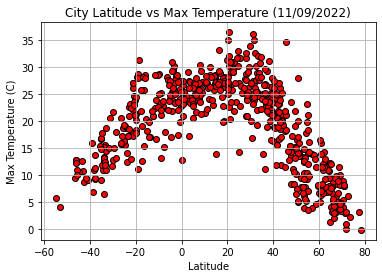

In [10]:
# Setup vairable
temperature = clean_cities_df['Max Temp']

# Creat scatter plot
plt.scatter(lat,temperature, marker="o", facecolors="red", edgecolors="black")

# Add labels, title and grid
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.grid()

# Saving to png
plt.savefig("Images/WeatherPy/Latitude_vs_Temperature_Plot.png")

# Display grid
plt.show()

With the plot above we are trying analyse if there is a relationship between the city latitude and the maximim temperature in that city.

## Latitude vs. Humidity Plot

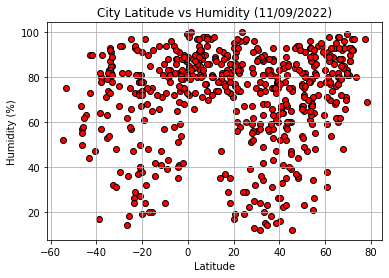

In [11]:
# Setup vairable
humidity = clean_cities_df['Humidity']

# Creat scatter plot
plt.scatter(lat,humidity, marker="o", facecolors="red", edgecolors="black")

# Add labels, title and grid
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({date})")
plt.grid()

# Saving to png
plt.savefig("Images/WeatherPy/Latitude_vs_Humidity_Plot.png")

# Display grid
plt.show()

With the plot above we are trying analyse if there is a relationship between the city latitude and the humidity in that city.

## Latitude vs. Cloudiness Plot

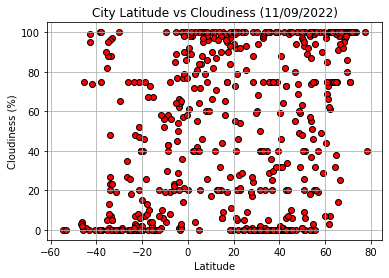

In [12]:
# Setup vairable
cloudiness = clean_cities_df['Cloudiness']

# Creat scatter plot
plt.scatter(lat,cloudiness, marker="o", facecolors="red", edgecolors="black")

# Add labels, title and grid
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.grid()

# Saving to png
plt.savefig("Images/WeatherPy/Latitude_vs_Cloudiness_Plot.png")

# Display grid
plt.show()

With the plot above we are trying analyse if there is a relationship between the city latitude and the cloudiness in that city.

## Latitude vs. Wind Speed Plot

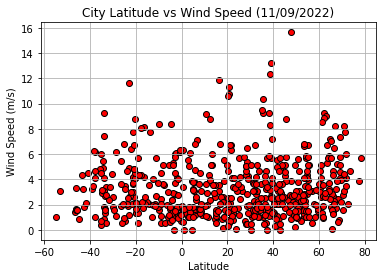

In [13]:
# Setup vairable
wind_speed = clean_cities_df['Wind Speed']

# Creat scatter plot
plt.scatter(lat,wind_speed, marker="o", facecolors="red", edgecolors="black")

# Add labels, title and grid
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.grid()

# Saving to png
plt.savefig("Images/WeatherPy/Latitude_vs_Wind_Speed_Plot.png")

# Display grid
plt.show()

## Linear Regression

In [14]:
# create seperate dataframes split into southern and northen hemispheres
north_hem_clean_cities_df = clean_cities_df.loc[clean_cities_df["Lat"] >= 0]
south_hem_clean_cities_df = clean_cities_df.loc[clean_cities_df["Lat"] < 0]

In [15]:
# Setup vairable to be used accross all plots
north_lat = north_hem_clean_cities_df["Lat"]
south_lat = south_hem_clean_cities_df["Lat"]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6222117735728788


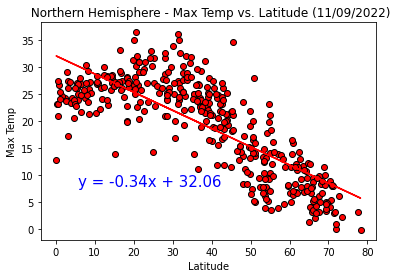

In [16]:
# Set variables for plotting
y_values = north_hem_clean_cities_df["Max Temp"]
x_values = north_lat

# Calculate and assign variables for lingress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Plot equation string
plt.annotate(line_eq,(5.8,8),fontsize=15,color="blue")

# Add labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f" Northern Hemisphere - Max Temp vs. Latitude ({date})")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Saving to png
plt.savefig("Images/WeatherPy/Northen_Hemisphere_Latitude_vs_Max_Temp_Plot.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6207629766996368


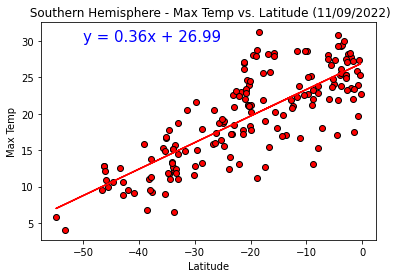

In [17]:
# Set variables for plotting
y_values = south_hem_clean_cities_df["Max Temp"]
x_values = south_lat

# Calculate and assign variables for lingress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation string
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Plot equation string
plt.annotate(line_eq2,(-50,30),fontsize=15,color="blue")

# Add labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f" Southern Hemisphere - Max Temp vs. Latitude ({date})")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Saving to png
plt.savefig("Images/WeatherPy/Southern_Hemisphere_Latitude_vs_Max_Temp_Plot.png")

plt.show()

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0006254672553479003


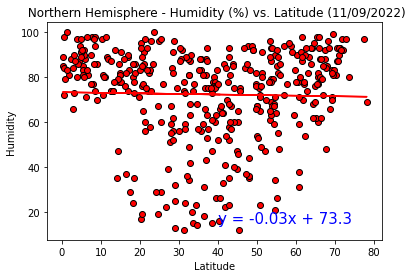

In [18]:
# Set variables for plotting
y_values = north_hem_clean_cities_df["Humidity"]
x_values = north_lat

# Calculate and assign variables for lingress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Plot equation string
plt.annotate(line_eq,(40,15),fontsize=15,color="blue")

# Add labels
plt.xlabel("Latitude")
plt.ylabel("Humidity ")
plt.title(f" Northern Hemisphere - Humidity (%) vs. Latitude ({date})")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Saving to png
plt.savefig("Images/WeatherPy/Northen_Hemisphere_Latitude_vs_Humidity_Plot.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.014153148872690188


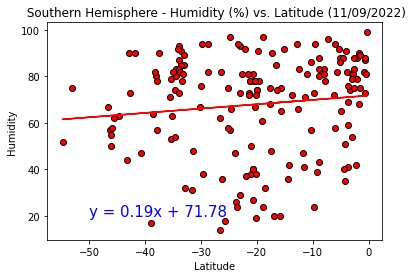

In [19]:
# Set variables for plotting
y_values = south_hem_clean_cities_df["Humidity"]
x_values = south_lat

# Calculate and assign variables for lingress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Plot equation string
plt.annotate(line_eq,(-50,20),fontsize=15,color="blue")

# Add labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f" Southern Hemisphere - Humidity (%) vs. Latitude ({date})")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Saving to png
plt.savefig("Images/WeatherPy/Southern_Hemisphere_Latitude_vs_Humidity_Plot.png")

plt.show()

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012386487858362796


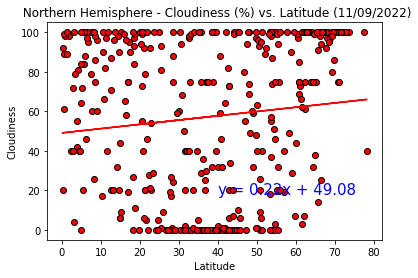

In [20]:
# Set variables for plotting
y_values = north_hem_clean_cities_df["Cloudiness"]
x_values = north_lat

# Calculate and assign variables for lingress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Plot equation string
plt.annotate(line_eq,(40,18),fontsize=15,color="blue")

# Add labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f" Northern Hemisphere - Cloudiness (%) vs. Latitude ({date})")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Saving to png
plt.savefig("Images/WeatherPy/Northen_Hemisphere_Latitude_vs_Cloudiness_Plot.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05282462265909024


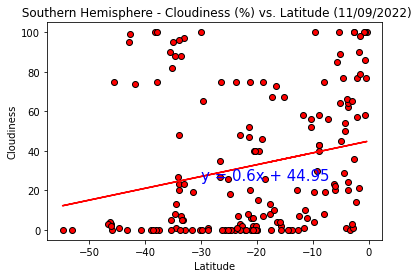

In [21]:
# Set variables for plotting
y_values = south_hem_clean_cities_df["Cloudiness"]
x_values = south_lat

# Calculate and assign variables for lingress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Plot equation string
plt.annotate(line_eq,(-30,25),fontsize=15,color="blue")

# Add labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f" Southern Hemisphere - Cloudiness (%) vs. Latitude ({date})")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Saving to png
plt.savefig("Images/WeatherPy/Southern_Hemisphere_Latitude_vs_Cloudiness_Plot.png")

plt.show()

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013118591671651489


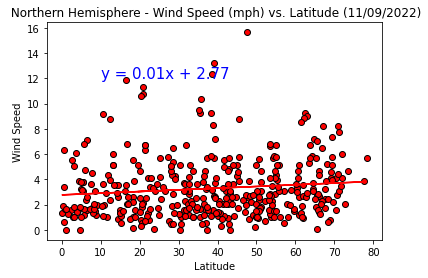

In [22]:
# Set variables for plotting
y_values = north_hem_clean_cities_df["Wind Speed"]
x_values = north_lat

# Calculate and assign variables for lingress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Plot equation string
plt.annotate(line_eq,(10,12),fontsize=15,color="blue")

# Add labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f" Northern Hemisphere - Wind Speed (mph) vs. Latitude ({date})")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Saving to png
plt.savefig("Images/WeatherPy/Northen_Hemisphere_Latitude_vs_Wind_Speed_Plot.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00011835277357662228


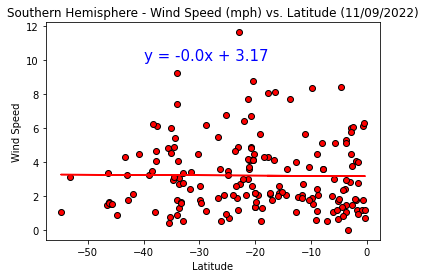

In [23]:
# Set variables for plotting
y_values = south_hem_clean_cities_df["Wind Speed"]
x_values = south_lat

# Calculate and assign variables for lingress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Plot equation string
plt.annotate(line_eq,(-40,10),fontsize=15,color="blue")

# Add labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude ({date})")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Saving to png
plt.savefig("Images/WeatherPy/Southern_Hemisphere_Latitude_vs_Wind_Speed_Plot.png")

plt.show()

## Findings

    -In the plot for Southern Hemisphere - Max Temp vs. Latitude Linear Regression, with a r-squared of 0.6207629766996368, reveals that approximitly 62% of the variability observed in the max temperature is explained by the regression model. This hilights that there is a potential relationship between reducing temperators the further South you travel. 

    -In the plot for Northern Hemisphere - Max Temp vs. Latitude Linear Regression, with a r-squared of 0.6222117735728788, reveals that approximitly 62% of the variability observed in the max temperature is explained by the regression model. This hilights that there is a potential relationship between reducing temperators the further North you travel. 
    
    - In plots ((Southern and Northern) Hemisphere vs. Wind Speed) there does not apear to be any positive relationships between the data. Southern Heisphere vs. Wind Speed reveals approximitly 0.01% and Northern Hemisphere vs. Wind Speed reveals approximitly 1.31% of the variability observed in the wind speed is explained by the regression model. Indicating more variability from other vairables and not the regression model.
    
 